<a href="https://colab.research.google.com/github/Benjamindavid03/MachineLearningLab/blob/main/Clustering_using_Gaussian_Mixture_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering using GMM

In [1]:
import pandas as pd
#import matplotlib as plt
from matplotlib import pyplot as plt

In [2]:
# Load the toy data
data = pd.read_csv('https://raw.githubusercontent.com/Benjamindavid03/MachineLearningLab/main/data.csv')
data
frame = pd.DataFrame(data)
frame

,68.125,59.645
0,50.152,951.115
1,12.600,58.100
2,95.150,135.010
3,12.600,58.100
4,32.300,95.150
5,68.150,98.645
6,68.150,98.645
7,58.152,91.115


In [3]:
# Fit the GaussianMixtureModel to 4 cluster components
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4)
gmm.fit(data)

GaussianMixture(n_components=4)

In [4]:
# Predict the Labels using the GMM
labels = gmm.predict(data)

In [5]:
#Reformat the DataFrame and Add labels to it as cluster
frame['cluster'] = labels
frame.columns = ['Weight', 'Height', 'cluster']
frame

,Weight,Height,cluster
0,50.152,951.115,1
1,12.600,58.100,0
2,95.150,135.010,3
3,12.600,58.100,0
4,32.300,95.150,2
5,68.150,98.645,2
6,68.150,98.645,2
7,58.152,91.115,2


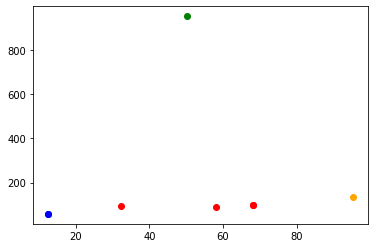

In [6]:
# Display the Points on a Scatter Plot
color = ['Blue', 'Green', 'Red', 'Orange']
for k in range (0,4):
  data = frame[frame["cluster"] == k]
  plt.scatter(data["Weight"],data["Height"],c=color[k])

# Text Clustering using GMM

In [7]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from time import time
import numpy as np
# Load some categories from the training set
categories = [
    "comp.windows.x",
]
# Uncomment the following to do the analysis on all the categories (MUST TRY)
#categories = None
#Fetching Dataset
print("Loading 20 newsgroups dataset for categories:")
dataset = fetch_20newsgroups(
    subset="all", categories=categories, shuffle=True, random_state=42
)
print("%d documents" % len(dataset.data))
print("%d categories" % len(dataset.target_names))
print()
labels = dataset.target  #target labels
true_k = np.unique(labels).shape[0] # The k-value from the categories
print("Extracting features from the training dataset using a sparse vectorizer")
t0 = time()
vectorizer = TfidfVectorizer(max_df=0.5,min_df=2,stop_words="english")
X = vectorizer.fit_transform(dataset.data)
print("done in %fs" % (time() - t0))
print("n_samples: %d, n_features: %d" % X.shape)
print()
from sklearn.mixture import GaussianMixture
#GMM Clustering 
gmm2 = GaussianMixture(n_components=3)
print("Clustering sparse data with %s" % gmm2)
gmm2.fit(X[:,50].toarray())
#Visualize the clusters formed
print("Top terms per cluster:")
terms = vectorizer.get_feature_names_out()

t = gmm2.predict(X[:,50].toarray())
print(t)
print(terms)  
# print the number of iterations needed for the log-likelihood value to converge
print(gmm2.n_iter_)
print(X[:,20])
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
print("Confusion Matrix: ", confusion_matrix(t, t))
print ("Accuracy : ",	accuracy_score(t,t)*100)
print("Report : ", classification_report(t, t))                                                                            

Loading 20 newsgroups dataset for categories:
988 documents
1 categories

Extracting features from the training dataset using a sparse vectorizer
done in 0.893744s
n_samples: 988, n_features: 10522

Clustering sparse data with GaussianMixture(n_components=3)
Top terms per cluster:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

# References

1. https://python-course.eu/machine-learning/expectation-maximization-and-gaussian-mixture-models-gmm.php
2. https://towardsdatascience.com/gaussian-mixture-modelling-gmm-833c88587c7f
3. http://www.cs.columbia.edu/~smaskey/CS6998-0412/slides/week3_statnlp_web.pdf
4. https://pythonmachinelearning.pro/clustering-with-gaussian-mixture-models/

